# 1. Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Write Function

In [2]:
def LoR_create_Xb(X):
    N = X.shape[0]
    ones = np.ones([N, 1])
    Xb = np.hstack([ones, X])
    return Xb

In [3]:
def LoR_find_W_local(X, Y, epoch = 1000, lr = 1):
    Xb = LoR_create_Xb(X)
    N = Xb.shape[0]
    D_1 = Xb.shape[1]
    W = np.random.randn(D_1, 1)/np.sqrt(D_1)
    error_list = []
    for i in range(epoch):
        Yhat = LoR_find_Yhat(X, W)
        # error = find_error_bin_class(Y, np.round(Yhat, 0))
        error = (-Y*np.log(Yhat) - (1 - Y)*np.log(1 - Yhat)).sum()
        error_list.append(error)
        S = np.dot(Xb.T, Y - Yhat)
        W = W + (lr/N)*S
    return W, error_list

In [4]:
def LoR_find_Yhat(X, W):
    Xb = LoR_create_Xb(X)
    Z = np.dot(Xb, W)
    Yhat = 1/(1 + np.exp(-Z))
    return Yhat

In [5]:
def find_error_bin_class(Y, Yhat):
    N = Y.shape[0]
    error = 100*(Y != Yhat).sum()/N
    return error

# 3. Normalization

In [6]:
def min4norm(Data):
    _min = Data.min(axis=0)
    return _min.reshape(1, -1)

In [7]:
def max4norm(Data):
    _max = Data.max(axis=0)
    return _max.reshape(1, -1)

In [8]:
def mean4norm(Data):
    _mean = Data.mean(axis=0)
    return _mean.reshape(1, -1)

In [9]:
def std4norm(Data):
    _std = Data.std(axis=0)
    return _std.reshape(1, -1)

In [10]:
def ed4norm(Data):
    _ed = np.sqrt((Data**2).sum(axis=0))
    return _ed.reshape(1, -1)

In [11]:
def minmaxNorm(Data, min_norm, max_norm):
    Data_Norm = (Data - min_norm)/(max_norm - min_norm)
    return Data_Norm

In [12]:
def meanNorm(Data, min_norm, max_norm, mean_norm):
    Data_Norm = (Data - mean_norm)/(max_norm - min_norm)
    return Data_Norm

In [13]:
def standardization(Data, mean_norm, std_norm):
    Data_Norm = (Data - mean_norm)/std_norm
    return Data_Norm

In [14]:
def SUL(Data, ed_norm):
    Data_Norm = Data/ed_norm
    return Data_Norm

In [15]:
def de_minmaxNorm(Data_Norm, min_norm, max_norm):
    Data = Data_Norm*(max_norm - min_norm) + min_norm
    return Data

In [16]:
def de_meanNorm(Data_Norm, min_norm, max_norm, mean_norm):
    Data = Data_Norm*(max_norm - min_norm) + mean_norm
    return Data

In [17]:
def de_standardization(Data_Norm, mean_norm, std_norm):
    Data = Data_Norm*std_norm + mean_norm
    return Data

In [18]:
def de_SUL(Data_Norm, ed_norm):
    Data = Data_Norm*ed_norm
    return Data

# 4. Read Data & Prepare Data

In [19]:
Data = pd.read_csv('./Data_set/framingham.csv')

In [20]:
Data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [21]:
Data_dropout = Data.dropna()
Data_dropout

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [22]:
DataMatrix = Data_dropout.values

In [23]:
DataMatrix.shape

(3656, 16)

In [24]:
D = DataMatrix.shape[1] - 1

In [25]:
X = DataMatrix[:, :D]

In [26]:
Y = DataMatrix[:, D:D+1]

In [27]:
X.shape

(3656, 15)

In [28]:
Y.shape

(3656, 1)

In [29]:
#plt.scatter(DataMatrix[:, 0], Y)
#plt.scatter(DataMatrix[:, :D], DataMatrix[:, D:D+1])
#plt.plot(Y, label = '0-1')

In [30]:
# 3656-1656
X_Train = X[:-1656, :]
Y_Train = Y[:-1656, :]

In [31]:
X_Test = X[-1656:, :]
Y_Test = Y[-1656:, :]

# 5. Create Model

In [32]:
min_X_Train = min4norm(X_Train)
max_X_Train = max4norm(X_Train)
mean_X_Train = mean4norm(X_Train)
std_X_Train = std4norm(X_Train)
ed_X_Train = ed4norm(X_Train)

In [33]:
# X_Train_Norm = minmaxNorm(X_Train, min_X_Train, max_X_Train)
X_Train_Norm = meanNorm(X_Train, min_X_Train, max_X_Train, mean_X_Train)
# X_Train_Norm = standardization(X_Train, mean_X_Train, std_X_Train)
# X_Train_Norm = SUL(X_Train, ed_X_Train)

In [34]:
W, error_list = LoR_find_W_local(X_Train_Norm, Y_Train, epoch = 100000, lr = 0.01) #100000

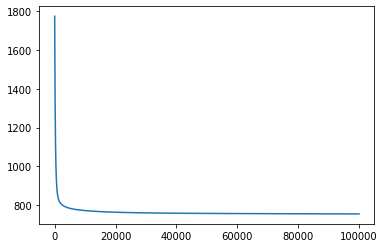

In [35]:
plt.plot(error_list)

In [36]:
W

array([[-1.97044427],
       [ 0.34318606],
       [ 2.1458854 ],
       [-0.05666007],
       [ 0.14854864],
       [ 1.19096551],
       [-0.00916208],
       [ 0.14843025],
       [ 0.32862446],
       [ 0.63681824],
       [ 1.09769759],
       [ 1.71012134],
       [ 0.17709616],
       [ 0.39089366],
       [-0.92702937],
       [ 1.55670279]])

In [37]:
len(W)

16

In [38]:
Yhat_Train = LoR_find_Yhat(X_Train, W)

In [39]:
error_Train = find_error_bin_class(Y_Train, np.round(Yhat_Train, 0))

In [40]:
error_Train

85.05

In [41]:
np.hstack([np.round(Yhat_Train, 0), Y_Train])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

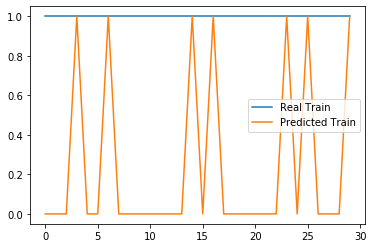

In [42]:
plt.plot(np.round(Yhat_Train[:30], 0), label = 'Real Train')
plt.plot(Y_Train[:30], label = 'Predicted Train')
plt.legend()

# 6. Make Prediction

In [43]:
#X_Test_Norm = minmaxNorm(X_Test, min_X_Train, max_X_Train)
X_Test_Norm = meanNorm(X_Test, min_X_Train, max_X_Train, mean_X_Train)
# X_Test_Norm = standardization(X_Test, mean_X_Train, std_X_Train)
# X_Test_Norm = SUL(X_Test, ed_X_Train)

In [44]:
Yhat_Test = LoR_find_Yhat(X_Test, W)

In [45]:
error_Test = find_error_bin_class(Y_Test, np.round(Yhat_Test, 0))

In [46]:
error_Test

84.42028985507247